In [1]:
%run ./PPS_Expansion_Model.ipynb

/home/renato/.virtualenvs/pps/lib/python3.11/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
/tmp/ipykernel_11551/1247435164.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Distance points in cm (network coordinates)
s_distances = np.asarray([2700, 2200, 1500, 800, 300]) / 1000
s_distances_sec = np.linspace(s_distances[0], s_distances[-1], 15)
v = 30  # cm/s
a_distances = 100 - s_distances_sec * v  # distance points in cm (network coordinates)

ts = 0.4
simtime = 200

In [3]:
HCLt, HCLa, HCLv = Lw(0.15, 0.05, 1, 4, 0.15, 0.05, 20, 80, 0.15, 0.05, 2, 8)
HCWat, HCWvt, HCWav = crossmodal(0.05, 2, 0.05, 2, 0.05, 2)
HCWt, HCWa, HCWv, HCBt, HCBa, HCBv = FwFb(
    6.5, 6.5, 6.5, 6.55, 6.55, 6.55, 1.083e01, 5.076e02, 3.226e01, 9.968e-01
)  # feedforward and feedback

_, _, _, _, HCrt = experiment(
    ts,
    simtime,
    a_distances,
    5,
    HCLt,
    HCLa,
    HCLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

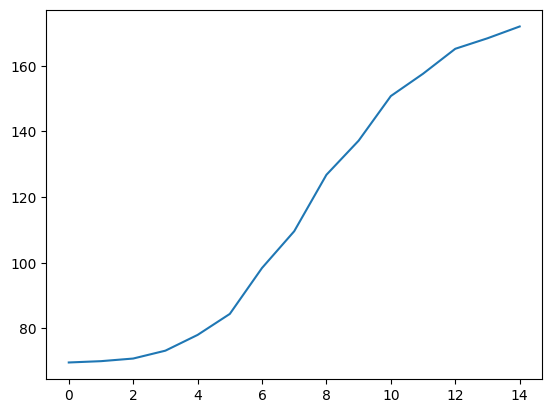

In [4]:
plt.plot(HCrt)

## HC Training

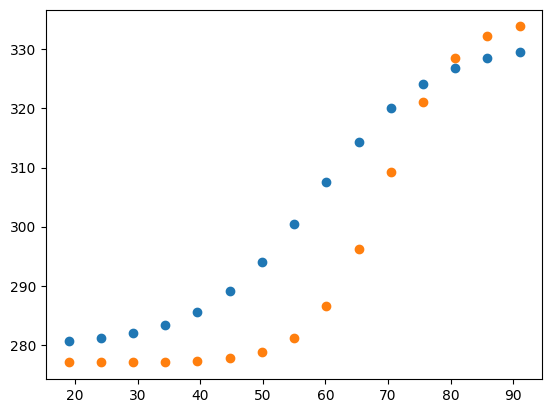

In [5]:
##Pre-Training
###Healthy Controls
ymin = 280
ymax = 331
fprHCCP = 100 - 1.377 * v
fprHCS = 1 / 0.11  # negative

HC_RTs = RTsig(a_distances, fprHCCP, fprHCS)

##Post-Training
###Healthy Controls
ymin = 277
ymax = 335
fpostHCCP = 100 - 1.028 * v
fpostHCS = 1 / 0.18  # negative

HC_RTs_post = RTsig(a_distances, fpostHCCP, fpostHCS)

plt.scatter(a_distances, HC_RTs)
plt.scatter(a_distances, HC_RTs_post)

In [6]:
rho_0, sigav_x, locav_x = 7.533e-03, 5.394e00, 3.271e01

k_a = 5e-05
k_v = 5e-05
theta = 0.05
stim_counts = 10

HCWa_tr, HCWv_tr, _, _, _, _ = FWTraining(
    stim_counts,
    simtime,
    ts,
    HCLt,
    HCLa,
    HCLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    rho_0,
    6.5,
    6.5,
    k_a,
    k_v,
    theta,
    sigav_x,
    locav_x,
)

_, _, _, _, HCrtpost = experiment(
    ts,
    simtime,
    a_distances,
    5,
    HCLt,
    HCLa,
    HCLv,
    HCWt,
    HCWa_tr[:, :, -1, -1],
    HCWv_tr[:, :, -1, -1],
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

In [7]:
HC_RTs_model_post = fit_RT(HCrtpost, HC_RTs_post)
HC_RTs_model_pre = fit_RT(HCrt, HC_RTs)

ymin, ymax = np.min(HC_RTs_model_pre), np.max(HC_RTs_model_pre)
HC_CP_model_pre, HC_SLOPE_model_pre = fitting(a_distances, HC_RTs_model_pre)

ymin, ymax = np.min(HC_RTs_model_post), np.max(HC_RTs_model_post)
HC_CP_model_post, HC_SLOPE_model_post = fitting(a_distances, HC_RTs_model_post)

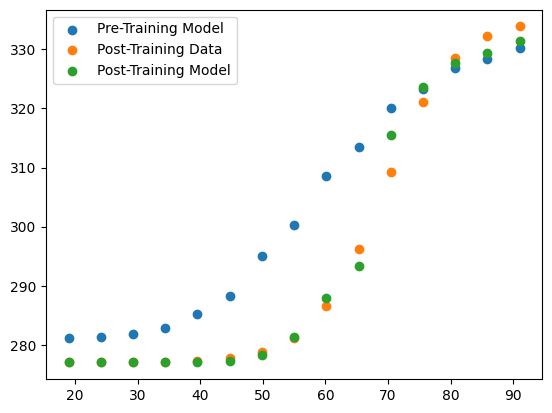

In [8]:
# plt.scatter(a_distances,HC_RTs, label="Pre-Training Data")
plt.scatter(a_distances, HC_RTs_model_pre, label="Pre-Training Model")
plt.scatter(a_distances, HC_RTs_post, label="Post-Training Data")
plt.scatter(a_distances, HC_RTs_model_post, label="Post-Training Model")
plt.legend()

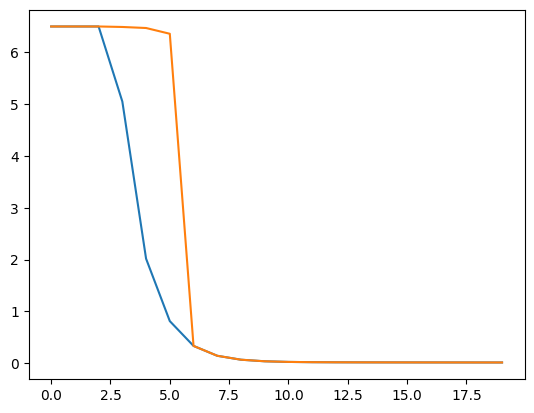

In [9]:
plt.plot(HCWa_tr[:, 1, 0, 0])
plt.plot(HCWa_tr[:, 1, -1, -1])

## SCZ Training

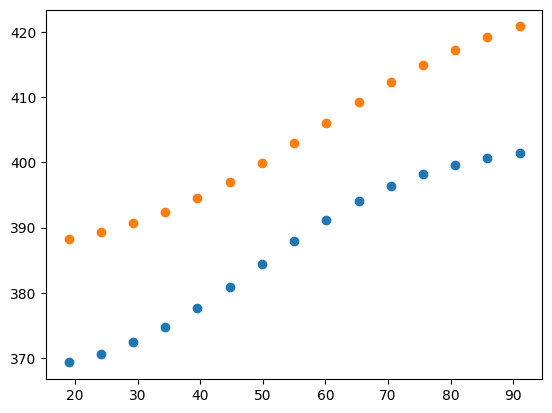

In [10]:
##Pre-Training
###SCZ
ymin = 366
ymax = 403
scz_cp = 100 - 1.666 * 30
scz_slope = 1 / 0.075

SCZ_RTs = RTsig(a_distances, scz_cp, scz_slope)

##Post-Training
###SCZ
ymin = 385
ymax = 426
scz_cp_post = 100 - 1.361 * v
scz_slope_post = 1 / 0.061  # negative

SCZ_RTs_post = RTsig(a_distances, scz_cp_post, scz_slope_post)

plt.scatter(a_distances, SCZ_RTs)
plt.scatter(a_distances, SCZ_RTs_post)

In [11]:
rho_0, sigav_x, locav_x = 7.533e-03, 5.394e00, 3.271e01

stim_counts = 10
k_a = 5e-05
k_v = 5e-05
theta = 0.05

Lex, Pr = 1.963e00, 1.044e-01

SCZLt, SCZLa, SCZLv = Lw(Lex, 0.05, 1, 4, Lex, 0.05, 20, 80, Lex, 0.05, 2, 8)
_, _, _, _, SCZrt = experiment(
    ts,
    simtime,
    a_distances,
    5,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    0,
)

In [12]:
SCZWa_tr, SCZWv_tr, _, _, _, _ = FWTraining(
    stim_counts,
    simtime,
    ts,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    rho_0,
    6.5,
    6.5,
    k_a,
    k_v,
    theta,
    sigav_x,
    locav_x,
)

_, _, _, _, SCZrtpost = experiment(
    ts,
    simtime,
    a_distances,
    5,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    SCZWa_tr[:, :, -1, -1],
    SCZWv_tr[:, :, -1, -1],
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

In [13]:
SCZ_RTs_model_post = fit_RT(SCZrtpost, SCZ_RTs_post)
SCZ_RTs_model_pre = fit_RT(SCZrt, SCZ_RTs_post)

ymin, ymax = np.min(SCZ_RTs_model_pre), np.max(SCZ_RTs_model_pre)
SCZ_CP_model_pre, SCZ_SLOPE_model_pre = fitting(a_distances, SCZ_RTs_model_pre)

ymin, ymax = np.min(SCZ_RTs_model_post), np.max(SCZ_RTs_model_post)
SCZ_CP_model_post, SCZ_SLOPE_model_post = fitting(a_distances, SCZ_RTs_model_post)

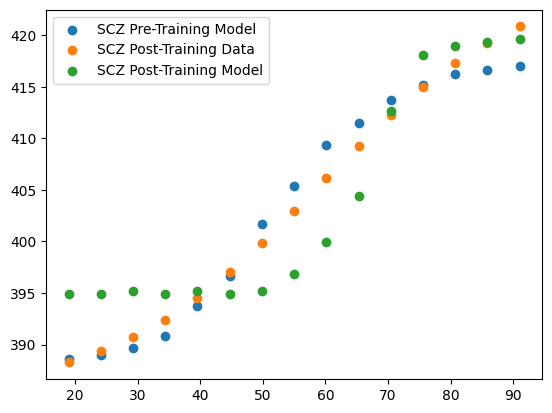

In [14]:
# plt.scatter(a_distances, SCZ_RTs, label="SCZ Pre-Training Data")
plt.scatter(a_distances, SCZ_RTs_model_pre, label="SCZ Pre-Training Model")
plt.scatter(a_distances, SCZ_RTs_post, label="SCZ Post-Training Data")
plt.scatter(a_distances, SCZ_RTs_model_post, label="SCZ Post-Training Model")
plt.legend()

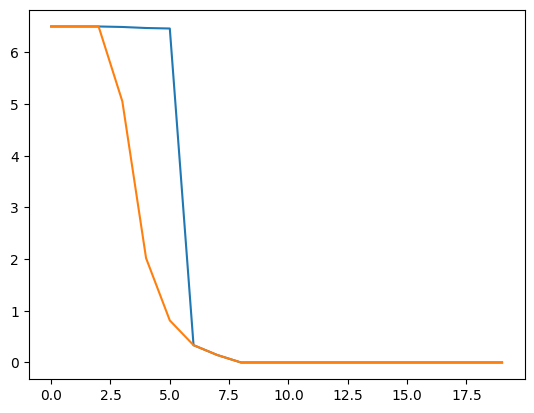

In [15]:
plt.plot(SCZWa_tr[:, 1, -1, -1])
plt.plot(SCZWa_tr[:, 1, 0, 0])

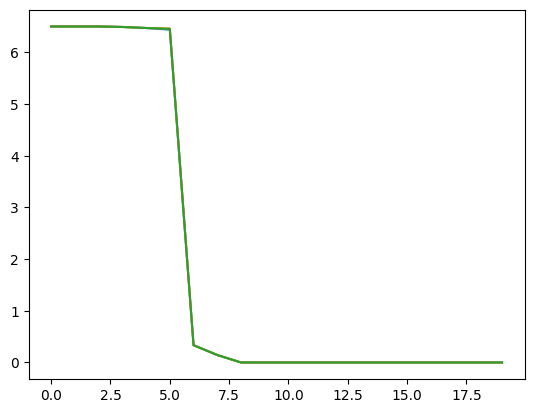

In [16]:
plt.plot(SCZWa_tr[:, :, -1, -1])

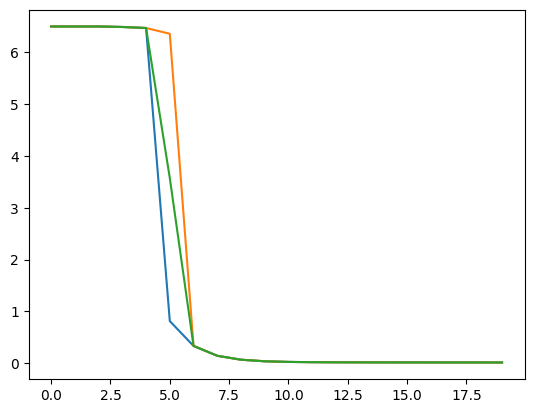

In [17]:
plt.plot(HCWa_tr[:, :, -1, -1])

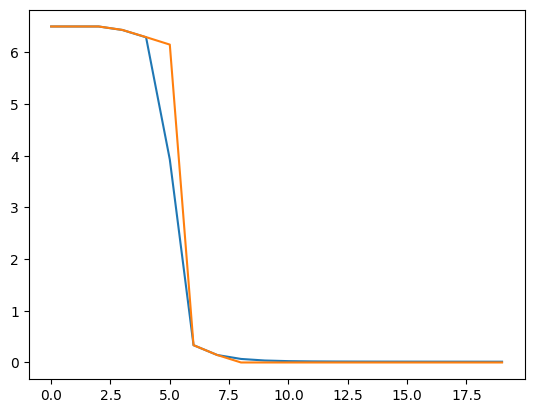

In [18]:
plt.plot(HCWa_tr[:, 1, 0, -1])
plt.plot(SCZWa_tr[:, 1, 0, -1])

## SCZ L_ex Model

In [19]:
rho_0, sigav_x, locav_x = 7.533e-03, 5.394e00, 3.271e01

stim_counts = 10
k_a = 5e-05
k_v = 5e-05
theta = 0.05

Lex = 1.962e00

SCZLt, SCZLa, SCZLv = Lw(Lex, 0.05, 1, 4, Lex, 0.05, 20, 80, Lex, 0.05, 2, 8)
_, _, _, _, SCZrt_Lex = experiment(
    ts,
    simtime,
    a_distances,
    5,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

In [20]:
SCZWa_tr, SCZWv_tr, _, _, _, _ = FWTraining(
    stim_counts,
    simtime,
    ts,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    rho_0,
    6.5,
    6.5,
    k_a,
    k_v,
    theta,
    sigav_x,
    locav_x,
)

_, _, _, _, SCZrtpost_Lex = experiment(
    ts,
    simtime,
    a_distances,
    5,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    SCZWa_tr[:, :, -1, -1],
    SCZWv_tr[:, :, -1, -1],
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

In [21]:
SCZ_Lex_RTs_model_post = fit_RT(SCZrtpost_Lex, SCZ_RTs_post)
SCZ_Lex_RTs_model_pre = fit_RT(SCZrt_Lex, SCZ_RTs)

ymin, ymax = np.min(SCZ_Lex_RTs_model_pre), np.max(SCZ_Lex_RTs_model_pre)
SCZ_Lex_CP_model_pre, SCZ_Lex_SLOPE_model_pre = fitting(
    a_distances, SCZ_Lex_RTs_model_pre
)

ymin, ymax = np.min(SCZ_Lex_RTs_model_post), np.max(SCZ_Lex_RTs_model_post)
SCZ_Lex_CP_model_post, SCZ_Lex_SLOPE_model_post = fitting(
    a_distances, SCZ_Lex_RTs_model_post
)

## SCZ Pr Model

In [22]:
rho_0, sigav_x, locav_x = 7.533e-03, 5.394e00, 3.271e01

stim_counts = 10
k_a = 5e-05
k_v = 5e-05
theta = 0.05

Lex = 0.15
Pr = 2.586e-02

SCZLt, SCZLa, SCZLv = Lw(Lex, 0.05, 1, 4, Lex, 0.05, 20, 80, Lex, 0.05, 2, 8)
_, _, _, _, SCZrt_Pr = experiment(
    ts,
    simtime,
    a_distances,
    5,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    0,
)

In [23]:
SCZWa_tr, SCZWv_tr, _, _, _, _ = FWTraining(
    stim_counts,
    simtime,
    ts,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    HCWa,
    HCWv,
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    Pr,
    rho_0,
    6.5,
    6.5,
    k_a,
    k_v,
    theta,
    sigav_x,
    locav_x,
)

_, _, _, _, SCZrtpost_Pr = experiment(
    ts,
    simtime,
    a_distances,
    5,
    SCZLt,
    SCZLa,
    SCZLv,
    HCWt,
    SCZWa_tr[:, :, -1, -1],
    SCZWv_tr[:, :, -1, -1],
    HCBt,
    HCBa,
    HCBv,
    HCWat,
    HCWvt,
    HCWav,
    0,
    0,
)

In [24]:
SCZ_Pr_RTs_model_post = fit_RT(SCZrtpost_Pr, SCZ_RTs_post)
SCZ_Pr_RTs_model_pre = fit_RT(SCZrt_Pr, SCZ_RTs)

ymin, ymax = np.min(SCZ_Pr_RTs_model_pre), np.max(SCZ_Pr_RTs_model_pre)
SCZ_Pr_CP_model_pre, SCZ_Pr_SLOPE_model_pre = fitting(a_distances, SCZ_Pr_RTs_model_pre)

ymin, ymax = np.min(SCZ_Pr_RTs_model_post), np.max(SCZ_Pr_RTs_model_post)
SCZ_Pr_CP_model_post, SCZ_Pr_SLOPE_model_post = fitting(
    a_distances, SCZ_Pr_RTs_model_post
)

In [25]:
cols = ["Model", "Training", "Central Point (cm)", "Slope"]
sim_data = np.array(
    [
        # ["HC", "Pre", HC_CP_model_pre, 1 / HC_SLOPE_model_pre],
        # ["HC", "Post", HC_CP_model_post, 1 / HC_SLOPE_model_post],
        ["SCZ - L_ex", "Pre", SCZ_Lex_CP_model_pre, 1 / SCZ_Lex_SLOPE_model_pre],
        ["SCZ - L_ex", "Post", SCZ_Lex_CP_model_post, 1 / SCZ_Lex_SLOPE_model_post],
        ["SCZ - rho", "Pre", SCZ_Pr_CP_model_pre, 1 / SCZ_Pr_SLOPE_model_pre],
        ["SCZ - rho", "Post", SCZ_Pr_CP_model_post, 1 / SCZ_Pr_SLOPE_model_post],
        ["SCZ - L_ex - rho", "Pre", SCZ_CP_model_pre, 1 / SCZ_SLOPE_model_pre],
        ["SCZ - L_ex - rho", "Post", SCZ_CP_model_post, 1 / SCZ_SLOPE_model_post],
        ["HC", "Pre", fprHCCP, 1 / fprHCS],
        ["HC", "Post", fpostHCCP, 1 / fpostHCS],
        ["SCZ", "Pre", scz_cp, 1 / scz_slope],
        ["SCZ", "Post", scz_cp_post, 1 / scz_slope_post],
    ]
)
sim_df = pd.DataFrame(sim_data, columns=cols)
sim_df[["Central Point (cm)", "Slope"]] = sim_df[
    ["Central Point (cm)", "Slope"]
].astype(float)
sim_df

,Model,Training,Central Point (cm),Slope
0,SCZ - L_ex,Pre,51.915087,0.124011
1,SCZ - L_ex,Post,66.486098,0.242310
2,SCZ - rho,Pre,58.865932,0.118413
3,SCZ - rho,Post,67.564019,0.225552
4,SCZ - L_ex - rho,Pre,52.181298,0.122487
5,SCZ - L_ex - rho,Post,66.583142,0.244006
6,HC,Pre,58.690000,0.110000
7,HC,Post,69.160000,0.180000
8,SCZ,Pre,50.020000,0.075000
9,SCZ,Post,59.170000,0.061000


In [26]:
import seaborn as sns

sns.set_context("paper")
sns.set_theme(
    style="ticks",
    palette=["black", "black", "black", "gray", "gray"],
    rc={"axes.labelsize": 14, "axes.labelweight": "bold"},
)

/home/renato/.virtualenvs/pps/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/renato/.virtualenvs/pps/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/renato/.virtualenvs/pps/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/renato/.virtualenvs

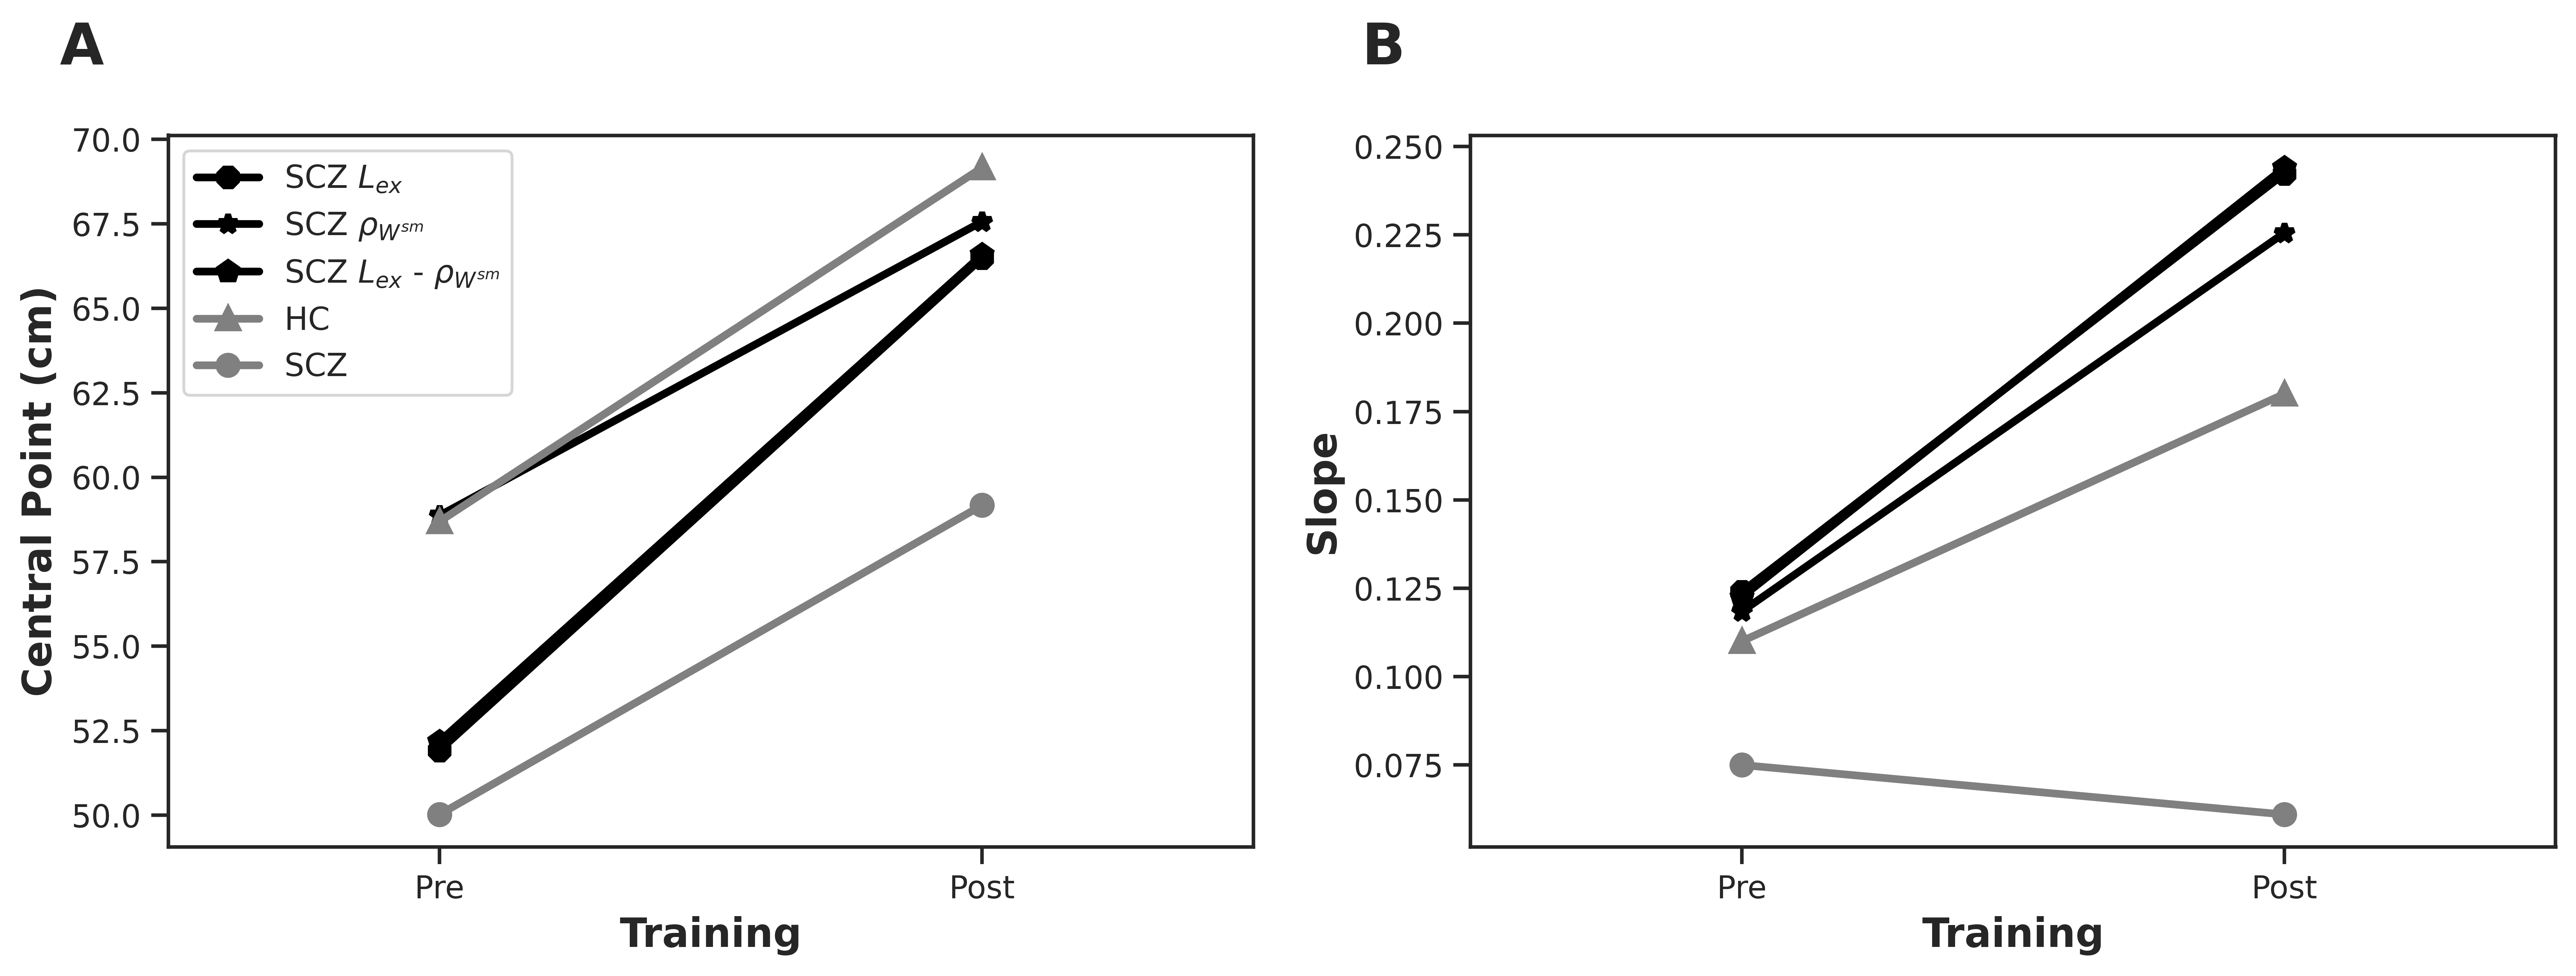

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4.5), dpi=600)

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
sns.pointplot(
    x="Training",
    y="Central Point (cm)",
    hue="Model",
    data=sim_df,
    ax=ax1,
    markers=["8", "*", "p", "^", "o"],
)
sns.pointplot(
    x="Training",
    y="Slope",
    hue="Model",
    data=sim_df,
    ax=ax2,
    markers=["8", "*", "p", "^", "o"],
)

ax1.text(
    -0.1,
    1.1,
    string.ascii_uppercase[0],
    transform=ax1.transAxes,
    size=20,
    weight="bold",
)

ax2.text(
    -0.1,
    1.1,
    string.ascii_uppercase[1],
    transform=ax2.transAxes,
    size=20,
    weight="bold",
)

handles, _ = ax1.get_legend_handles_labels()
labels = [
    "SCZ $L_{ex}$",
    "SCZ " + r"$\rho_{{W}^{sm}}$",
    "SCZ $L_{ex}$ - " + r"$\rho_{{W}^{sm}}$",
    "HC",
    "SCZ",
]
ax1.legend(handles, labels)
ax2.get_legend().remove()

fig.savefig("drafts/FIG4.eps", bbox_inches="tight", format="eps")

In [28]:
delta_cols = ["Model", "CP", "Slope"]
delta_sim_data = np.array(
    [
        [
            "HC",
            HC_CP_model_pre - HC_CP_model_post,
            1 / HC_SLOPE_model_pre - 1 / HC_SLOPE_model_post,
        ],
        [
            "SCZ - L_ex",
            SCZ_Lex_CP_model_pre - SCZ_Lex_CP_model_post,
            1 / SCZ_Lex_SLOPE_model_pre - 1 / SCZ_Lex_SLOPE_model_post,
        ],
        [
            "SCZ - Pr",
            SCZ_Pr_CP_model_pre - SCZ_Pr_CP_model_post,
            1 / SCZ_Pr_SLOPE_model_pre - 1 / SCZ_Pr_SLOPE_model_post,
        ],
        [
            "SCZ - L_ex + Pr",
            SCZ_CP_model_pre - SCZ_CP_model_post,
            1 / SCZ_SLOPE_model_pre - 1 / SCZ_SLOPE_model_post,
        ],
    ]
)

delta_sim_df = pd.DataFrame(delta_sim_data, columns=delta_cols)
delta_sim_df[["CP", "Slope"]] = delta_sim_df[["CP", "Slope"]].astype(float).abs()
delta_sim_df

,Model,CP,Slope
0,HC,8.698087,0.107139
1,SCZ - L_ex,14.571011,0.118300
2,SCZ - Pr,8.698087,0.107139
3,SCZ - L_ex + Pr,14.401845,0.121519
